# Importing Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Data Set

In [2]:
df=pd.read_csv('Employee Turnover.csv')

# Showing first 5 values

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# check datatype

In [4]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

# check columns and rows

In [5]:
df.shape

(14999, 10)

# check null values

In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

# Visualize null values

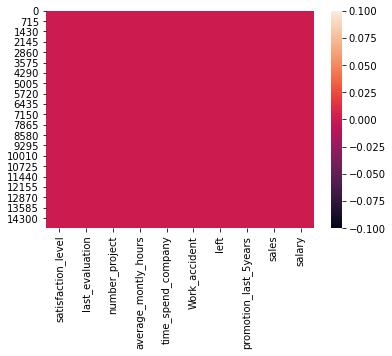

In [7]:
sns.heatmap(df.isnull())
plt.show()

# As there are no Null Values and all the Column Data Types are categorical and numerical now we will perform different Machine Learning Techniques.


In [8]:
#check duplicates
df.duplicated().sum()

3008

In [9]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
#check duplicates
df.duplicated().sum()

0

# Removed Duplicate Values

In [11]:
#separate data into categorical and numerical
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [12]:
#Categorical Data Type
df_cat

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
11995,management,high
11996,management,high
11997,management,high
11998,marketing,high


In [13]:
#Numerical Data Type
df_num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1
11996,0.74,0.95,5,266,10,0,0,1
11997,0.85,0.54,3,185,10,0,0,1
11998,0.33,0.65,3,172,10,0,0,1


# Applying LabelEncoder

In [14]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
  le=LabelEncoder()
  df_cat[col]=le.fit_transform(df_cat[[col]])

In [15]:
df_cat.head()

,sales,salary
0,7,1
1,7,2
2,7,2
3,7,1
4,7,1


In [16]:
#concatenate
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [17]:
#checking y column 
df['left'].unique()

array([1, 0], dtype=int64)

In [18]:
#separate x and y
x=df_new.drop('left',axis=1)
y=df_new['left']

# Applying Training and Testing on Data Set 

In [19]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

# Applying Scaling on Data Set

In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
def create_model(model):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  return model

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2971
           1       0.49      0.18      0.26       627

    accuracy                           0.82      3598
   macro avg       0.67      0.57      0.58      3598
weighted avg       0.79      0.82      0.79      3598

[[2855  116]
 [ 514  113]]


# Here as we can see the data is not equaly distributed.

In [24]:
#checking Data Type is Balanced or no
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

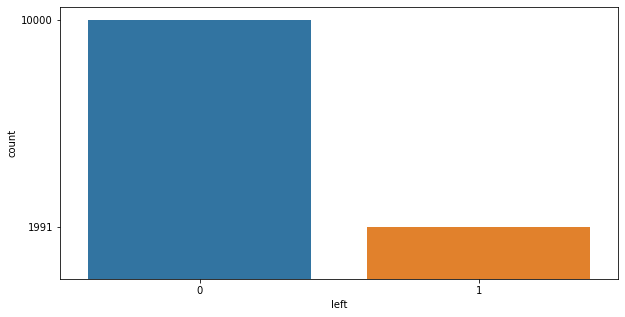

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='left')
f = df['left'].value_counts()
plt.yticks(f)
plt.show()


# Conclusion.
From the above value_counts of 'left' Column and from the Graph
There are about: '10000' Employees out of which '1991' were left
Which means the Data is not properly distributed

# Applying ' RandomOverSampler ' to make data equal.

In [26]:
#!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=1)

In [27]:
#training
x_train_ros,y_train_ros=ros.fit_resample(x_train,y_train)

In [28]:
y_train_ros.value_counts()

0    7029
1    7029
Name: left, dtype: int64

In [29]:
y_test.value_counts()

0    2971
1     627
Name: left, dtype: int64

In [30]:
#testing
x_test_ros,y_test_ros=ros.fit_resample(x_test,y_test)

In [31]:
y_test_ros.value_counts()

0    2971
1    2971
Name: left, dtype: int64

In [32]:
y_train_ros.value_counts()

0    7029
1    7029
Name: left, dtype: int64

# Using LogisticRegression after Equalizing Data

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr

LogisticRegression()

In [34]:
lr=LogisticRegression()
lr.fit(x_train_ros,y_train_ros)

LogisticRegression()

In [35]:
y_pred_ros=lr.predict(x_test_ros)

In [36]:
lr.score(x_test_ros,y_test_ros)

0.7616963985190172

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [38]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      2971
           1       0.77      0.75      0.76      2971

    accuracy                           0.76      5942
   macro avg       0.76      0.76      0.76      5942
weighted avg       0.76      0.76      0.76      5942



In [39]:
print(confusion_matrix(y_test_ros,y_pred_ros))

[[2293  678]
 [ 738 2233]]


In [40]:
def create_model(model):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  return model

In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2971
           1       0.49      0.18      0.26       627

    accuracy                           0.82      3598
   macro avg       0.67      0.57      0.58      3598
weighted avg       0.79      0.82      0.79      3598

[[2855  116]
 [ 514  113]]


# Before equalizing the data Logistic Regression score was 81% which was too Low.

# After equalizing the data Logistic Regression score got to 81% which is low.


# So we will apply to all the methods to see if we get more accurate results.

# Decision Tree Using Gini Index

In [42]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier(random_state=1)
dct=create_model(dct)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2971
           1       0.89      0.93      0.91       627

    accuracy                           0.97      3598
   macro avg       0.94      0.95      0.94      3598
weighted avg       0.97      0.97      0.97      3598

[[2902   69]
 [  47  580]]


# Information Gain/Important Features

In [43]:
ig=dct.feature_importances_
print(ig)

[0.50737601 0.11484392 0.13594042 0.12242078 0.101508   0.0020528
 0.         0.01233077 0.00352731]


In [44]:
x.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [45]:
dct={'Input':x.columns,'IG':ig}
df=pd.DataFrame(dct)
df.sort_values('IG',ascending=False)

,Input,IG
0,satisfaction_level,0.507376
2,number_project,0.135940
3,average_montly_hours,0.122421
1,last_evaluation,0.114844
4,time_spend_company,0.101508
7,sales,0.012331
8,salary,0.003527
5,Work_accident,0.002053
6,promotion_last_5years,0.000000


# Pruining Technique (Decision Tree max_depth)

In [46]:
#pruning technique
dct1=DecisionTreeClassifier(random_state=1,max_depth=3)
dct1=create_model(dct1)


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2971
           1       0.84      0.93      0.88       627

    accuracy                           0.96      3598
   macro avg       0.91      0.95      0.93      3598
weighted avg       0.96      0.96      0.96      3598

[[2863  108]
 [  46  581]]


# 2nd pruning technique(min_samples_leaf)

In [47]:
#2nd pruning technique
dct2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
dct2=create_model(dct2)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2971
           1       0.91      0.91      0.91       627

    accuracy                           0.97      3598
   macro avg       0.95      0.95      0.95      3598
weighted avg       0.97      0.97      0.97      3598

[[2914   57]
 [  54  573]]


# *Decision Tree Using Entropy

In [48]:
dct=DecisionTreeClassifier(random_state=1,criterion='entropy')
dct=create_model(dct)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2971
           1       0.92      0.92      0.92       627

    accuracy                           0.97      3598
   macro avg       0.95      0.95      0.95      3598
weighted avg       0.97      0.97      0.97      3598

[[2921   50]
 [  49  578]]


# *Decision Tree Using Entropy(max_depth)

In [49]:
dct1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=3)
dct1=create_model(dct1)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2971
           1       0.81      0.93      0.87       627

    accuracy                           0.95      3598
   macro avg       0.90      0.94      0.92      3598
weighted avg       0.95      0.95      0.95      3598

[[2837  134]
 [  46  581]]


# *Decision Tree Using Entropy(min_samples_leaf)

In [50]:
dct1=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=1)
dct1=create_model(dct1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2971
           1       0.92      0.92      0.92       627

    accuracy                           0.97      3598
   macro avg       0.95      0.95      0.95      3598
weighted avg       0.97      0.97      0.97      3598

[[2921   50]
 [  49  578]]


# Visualize Tree Diagram

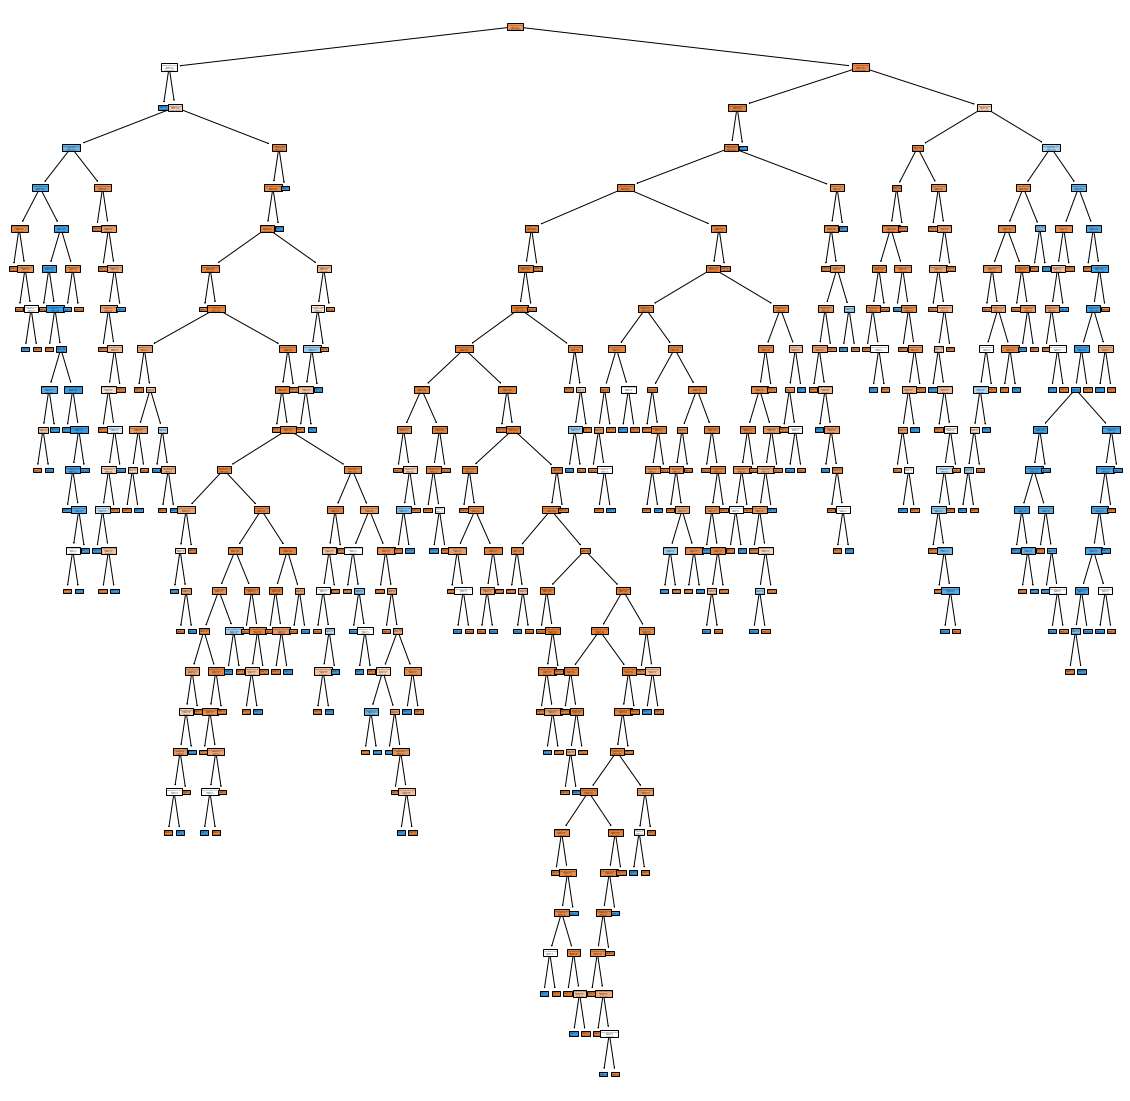

In [51]:
from sklearn import tree
fig=plt.figure(figsize=(20,20))
feature=x.columns
_=tree.plot_tree(dct1,filled=True,feature_names=feature)
plt.show()

# *RandomForestClassifier using Gini Index*

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_features=5,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2971
           1       0.99      0.93      0.96       627

    accuracy                           0.99      3598
   macro avg       0.99      0.96      0.97      3598
weighted avg       0.99      0.99      0.99      3598

[[2964    7]
 [  45  582]]


# RandomForestClassifier using Entropy

In [53]:
rfc1=RandomForestClassifier(criterion='entropy',n_estimators=100,max_features=5,random_state=1)
rfc1=create_model(rfc1)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2971
           1       0.99      0.93      0.96       627

    accuracy                           0.99      3598
   macro avg       0.99      0.96      0.97      3598
weighted avg       0.99      0.99      0.99      3598

[[2963    8]
 [  45  582]]


# ADA Boosting ( Adaptor Boosting )

In [54]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=50,random_state=1)
abc=create_model(abc)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2971
           1       0.92      0.88      0.90       627

    accuracy                           0.96      3598
   macro avg       0.94      0.93      0.94      3598
weighted avg       0.96      0.96      0.96      3598

[[2920   51]
 [  77  550]]


# *GradientBoosting*

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=50,random_state=1)
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2971
           1       0.93      0.93      0.93       627

    accuracy                           0.98      3598
   macro avg       0.96      0.96      0.96      3598
weighted avg       0.98      0.98      0.98      3598

[[2929   42]
 [  46  581]]


# *Xtreme Gradient Boost*

In [56]:
from xgboost import XGBClassifier
for i in range(1,101):
  print('no of estimators:',i)
  xgc=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)
  xgc=create_model(xgc)

no of estimators: 1
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2971
           1       0.97      0.93      0.95       627

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598

[[2950   21]
 [  45  582]]
no of estimators: 2
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2971
           1       0.97      0.93      0.95       627

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598

[[2950   21]
 [  45  582]]
no of estimators: 3
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2971
           1       0.96      0.93      0.95       627

    accuracy                           0.98      3598
   macro avg  

[[2960   11]
 [  44  583]]
no of estimators: 23
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2971
           1       0.98      0.93      0.95       627

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598

[[2960   11]
 [  44  583]]
no of estimators: 24
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2971
           1       0.98      0.93      0.95       627

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598

[[2960   11]
 [  44  583]]
no of estimators: 25
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2971
           1       0.98      0.93      0.95       627

    accuracy                          

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2971
           1       0.98      0.93      0.95       627

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598

[[2957   14]
 [  44  583]]
no of estimators: 46
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2971
           1       0.97      0.93      0.95       627

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598

[[2956   15]
 [  44  583]]
no of estimators: 47
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2971
           1       0.97      0.93      0.95       627

    accuracy                           0.98      3598
   macro avg       0.98      0.9

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2971
           1       0.97      0.93      0.95       627

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598

[[2956   15]
 [  44  583]]
no of estimators: 68
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2971
           1       0.97      0.93      0.95       627

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598

[[2955   16]
 [  44  583]]
no of estimators: 69
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2971
           1       0.97      0.93      0.95       627

    accuracy                           0.98      3598
   macro avg       0.98      0.9

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2971
           1       0.97      0.93      0.95       627

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598

[[2956   15]
 [  45  582]]
no of estimators: 90
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2971
           1       0.97      0.93      0.95       627

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598

[[2955   16]
 [  45  582]]
no of estimators: 91
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2971
           1       0.97      0.93      0.95       627

    accuracy                           0.98      3598
   macro avg       0.98      0.9

# *Using Support Vector Machine ( SVM )*

In [57]:
from sklearn.svm import LinearSVC
svc=LinearSVC()
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2971
           1       0.49      0.10      0.16       627

    accuracy                           0.83      3598
   macro avg       0.66      0.54      0.53      3598
weighted avg       0.78      0.83      0.77      3598

[[2907   64]
 [ 565   62]]


# Adding Error 

In [58]:
svc=LinearSVC(random_state=1,C=.1)
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2971
           1       0.49      0.10      0.16       627

    accuracy                           0.83      3598
   macro avg       0.66      0.54      0.53      3598
weighted avg       0.78      0.83      0.77      3598

[[2907   64]
 [ 565   62]]


# Conclusion:- There is no change in score as per C.

# which means data is not linearly separating.i.e the dataset is non-linear

# *SVC Polynomial Kernel Function*

In [59]:
from sklearn.svm import SVC
poly_svc=SVC(random_state=1,kernel='poly')
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2971
           1       0.87      0.87      0.87       627

    accuracy                           0.95      3598
   macro avg       0.92      0.92      0.92      3598
weighted avg       0.95      0.95      0.95      3598

[[2891   80]
 [  84  543]]


# KNeighborsClassifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2971
           1       0.87      0.91      0.89       627

    accuracy                           0.96      3598
   macro avg       0.93      0.94      0.94      3598
weighted avg       0.96      0.96      0.96      3598

[[2889   82]
 [  54  573]]


# GaussianNB

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2971
           1       0.52      0.61      0.56       627

    accuracy                           0.83      3598
   macro avg       0.72      0.75      0.73      3598
weighted avg       0.85      0.83      0.84      3598

[[2611  360]
 [ 242  385]]



# Conclusion

# We have used 17 different methods mentiond from above table with different methods with their percentage.


# The Best result we got is in DecisionTree Classifier i.e. 98%. 

<pre>

# Machine Learning Algorithms                        Results
------------------------------------------------------- -----------------------------------------------
1.Logistic Regression                                     1 : .18
                                                         
2.Decision Tree Classifier  (Gini)                        1 : .93
                                                          
3.Decision Tree Classifier  (Entropy)                     1 : .48
                                                          
4.Decision Tree Classifier  Max Depth (Gini)              1 : .95
                                                          
5.Decision Tree Classifier  Max Depth (Entropy)           1 : .95
                                                          
6.Decision Tree Classifier  Min Samples Leaf (Gini)       1: .61
                                                          
7.Decision Tree Classifier  Min Samples Leaf (Entropy)    1 :.48
                                                          
8.Random Forest Classifier (Gini)                         1: .56
                                                          
9.Random Forest Classifier (Entropy)                      1: .57
                                                          
10.Ada Boost Classifier                                   1: .76
                                                          
11.Gradient Boost Classifier                              1: .74
                                                          
12.Extreme Gradient Boost Classifier                      1: .78
                                                          
13.Linear SVC                                             1: .83
                                                          
14.Linear SVC(Adding Errors)                              1: .83
                                                          
15.SVC Polynomial Kernel Function                         1: .94
                                                          
16.KNeighbors Classifier                                  1: .59   

17.GaussianNB                                             1: 98 

 <pre>                                                         